<b>Sistema Fisico</b>

In [89]:
def simulacion(L):
    i=2;j=2
    while(i==j):
        i = randint(0, len(L)-1)
        j = randint(0, len(L)-1)
    if(L[i]>0):
        L[i] = L[i] - 1
        L[j] = L[j] + 1
    return L

In [37]:
L = [1, 2, 3, 4, 5, 6, 7, 8, 9]
for i in xsrange(10):
    print simulacion(L)

[2, 2, 3, 4, 5, 6, 7, 8, 8]
[2, 2, 3, 4, 4, 6, 7, 8, 9]
[1, 2, 4, 4, 4, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 2, 4, 5, 6, 7, 8, 10]
[2, 2, 2, 3, 5, 6, 7, 8, 10]
[2, 2, 3, 3, 5, 6, 7, 7, 10]
[2, 1, 3, 3, 5, 6, 7, 8, 10]
[2, 2, 3, 3, 5, 6, 6, 8, 10]
[2, 2, 3, 3, 4, 6, 6, 9, 10]


In [63]:
def evolFisica(n, N):
    L = list()
    for i in xsrange(n):
        L.append(5)
    for j in xsrange(N):
        L = simulacion(L)
    return L

In [64]:
L = evolFisica(10, 10)
print L
print (sum(L)/len(L)).n(digits = 3)

[6, 4, 2, 6, 6, 4, 5, 7, 5, 5]
5.00


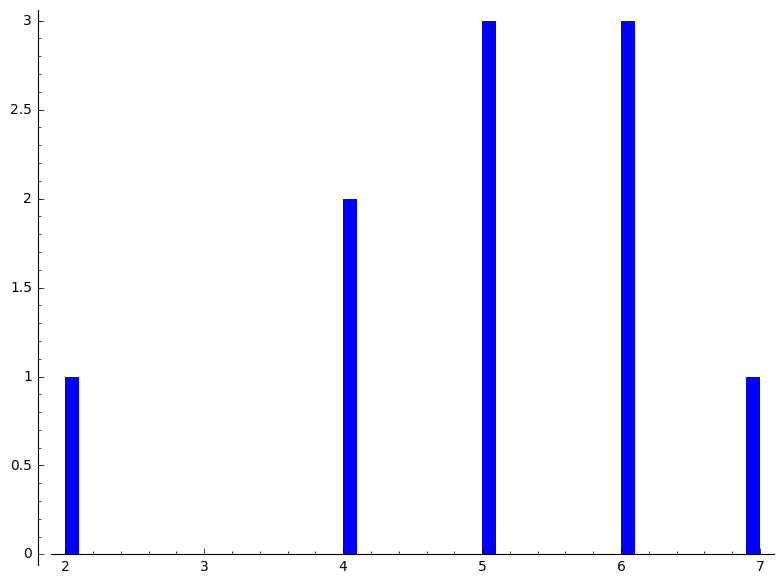

In [65]:
T = finance.TimeSeries(L)
T.plot_histogram()

In [82]:
listaHistogramas = list()
for k in xsrange(5):
    AUX = evolFisica(1000, 100*(10**k))
    listaHistogramas.append(AUX)

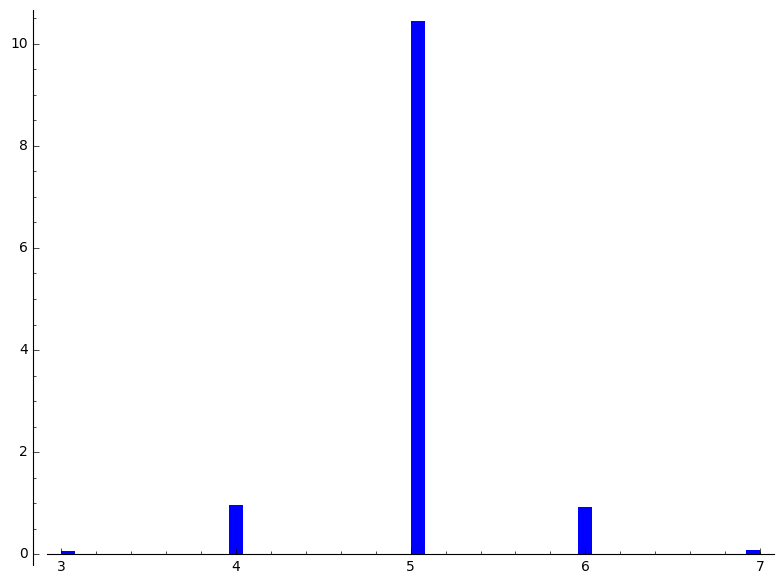

In [83]:
T0 = finance.TimeSeries(listaHistogramas[0])
T0.plot_histogram()

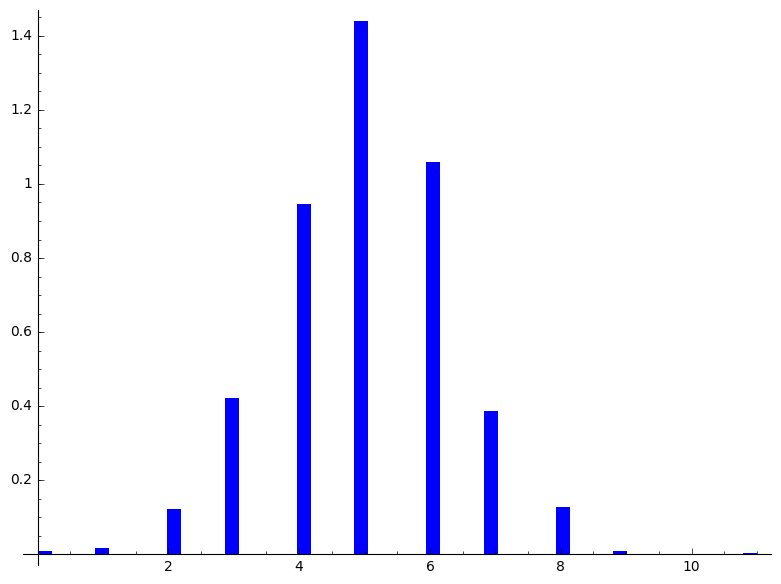

In [84]:
T1 = finance.TimeSeries(listaHistogramas[1])
T1.plot_histogram()

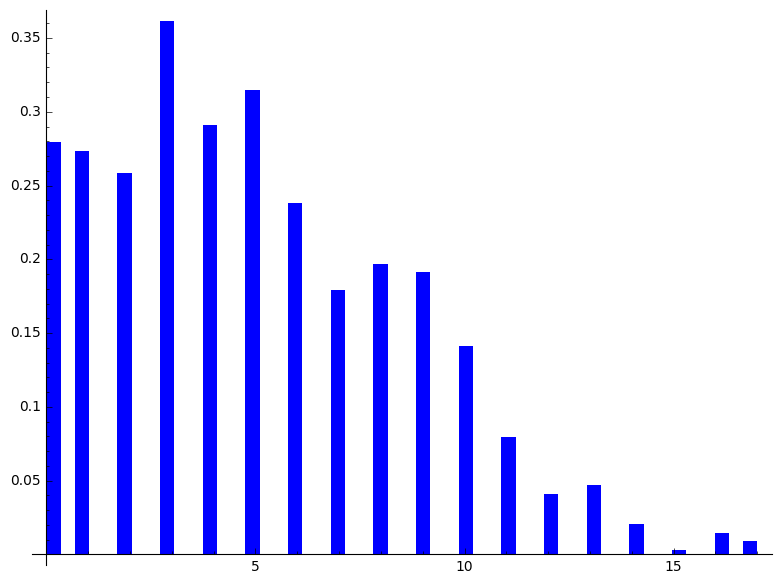

In [85]:
T2 = finance.TimeSeries(listaHistogramas[2])
T2.plot_histogram()

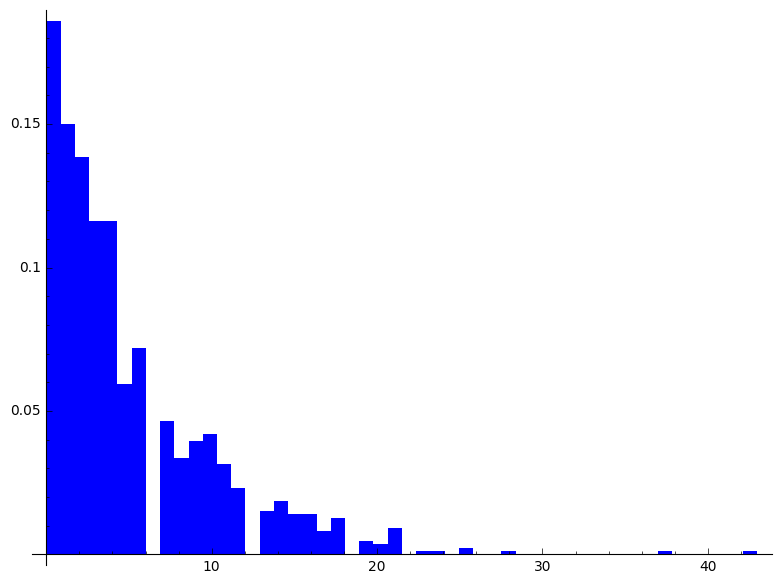

In [86]:
T3 = finance.TimeSeries(listaHistogramas[3])
T3.plot_histogram()

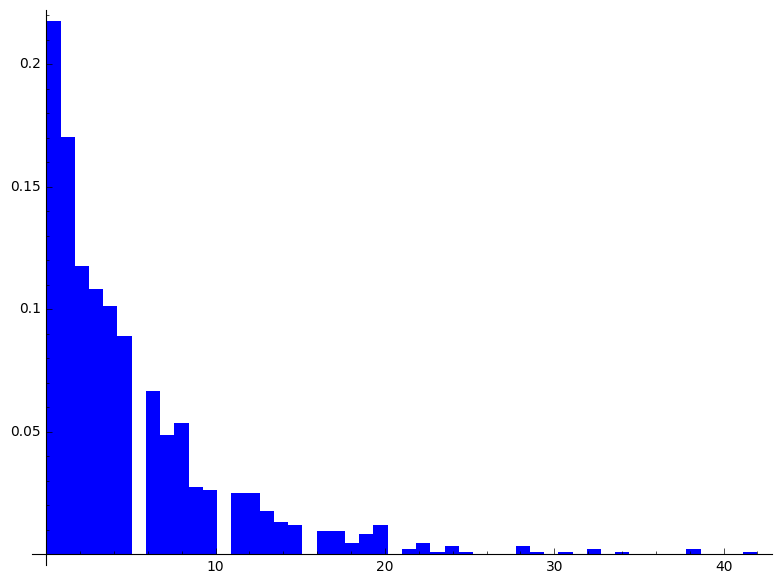

In [87]:
T4 = finance.TimeSeries(listaHistogramas[4])
T4.plot_histogram()

<b>Pasos 2-bidimensionales</b>

Vamos a calcular la distancia promedio al origen en el instante N.

In [92]:
def randDir(P):
    x = randint(1,4)
    if x==1:
        P[0] += 1
    elif x==2:
        P[0] -= 1
    elif x==3:
        P[1] += 1
    else:
        P[1] -= 1
    return P

In [105]:
def randWalkBidim(tiempo):
    P = [0,0]
    for i in xsrange(tiempo):
        P = randDir(P)
    dist = sqrt((P[0]**2)+(P[1]**2))
    return dist.n(digits=4)

In [106]:
print randWalkBidim(100)

18.11


In [118]:
total = 0;
for i in xsrange(1000):
    Aux1 = [randWalkBidim(100*k) for k in xsrange(1,10)]
    a = sum(Aux1)/len(Aux1)
    total += a
print("Media total: "+str(total/1000))

Media total: 19.05


Para un tiempo entre 100 y 1000 obtenemos una distancia media del origen de 19 u.

Vamos ahora intentar calcular la probabilidad de que la persona vuelva al origen con paseos aleatorios bidimensionales.

In [119]:
def Comeback(tiempo): #tiempo es la unidad de tiempo que le damos para que vuelva al origen
    P = [0,0]
    for i in xsrange(tiempo):
        P = randDir(P)
        if P[0]==0 and P[1]==0:
            return 1
    return 0

Vamos a probarlo con un tiempo de 100 unidades:

In [124]:
tot = 0
for i in xsrange(10000):
    tot += Comeback(100)
prob1 = (tot/10000).n(digits=4)
print("Probabilidad que vuelva con tiempo 100: "+str(prob1))

Probabilidad que vuelva con tiempo 100: 0.5808


Vamos a probarlo ahora con un tiempo de 1000 unidades:

In [125]:
tot2 = 0
for i in xsrange(10000):
    tot2 += Comeback(1000)
prob2 = (tot2/10000).n(digits=4)
print("Probabilidad que vuelva con tiempo 100: "+str(prob2))

Probabilidad que vuelva con tiempo 100: 0.6824


Cerca del 70%

<b>Urnas de Polya</b>

In [2]:
def nuevaUrna(L):
    AUX = copy(L)
    x = randint(0, len(L)-1)
    if L[x] == 0:
        AUX.append(0)
    elif L[x] == 1:
        AUX.append(1)
    else:
        print("Error")
        return -1
    return AUX

In [3]:
L = [1, 0]
L = nuevaUrna(L)
print L

[1, 0, 1]


In [4]:
def conjuntoUrnas(N):
    L = [0,1]
    T = []
    T.append(L)
    for i in xsrange(N):
        L = nuevaUrna(L)
        T.append(L)
    return T,T[-1]

In [5]:
Q = conjuntoUrnas(10)
print("Lista de urnas: ")
print Q[0]
print ("Ultima urna: ")
print Q[1]

Lista de urnas: 
[[0, 1], [0, 1, 0], [0, 1, 0, 0], [0, 1, 0, 0, 1], [0, 1, 0, 0, 1, 1], [0, 1, 0, 0, 1, 1, 1], [0, 1, 0, 0, 1, 1, 1, 0], [0, 1, 0, 0, 1, 1, 1, 0, 1], [0, 1, 0, 0, 1, 1, 1, 0, 1, 1], [0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0], [0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1]]
Ultima urna: 
[0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1]


/usr/local/SageMath/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


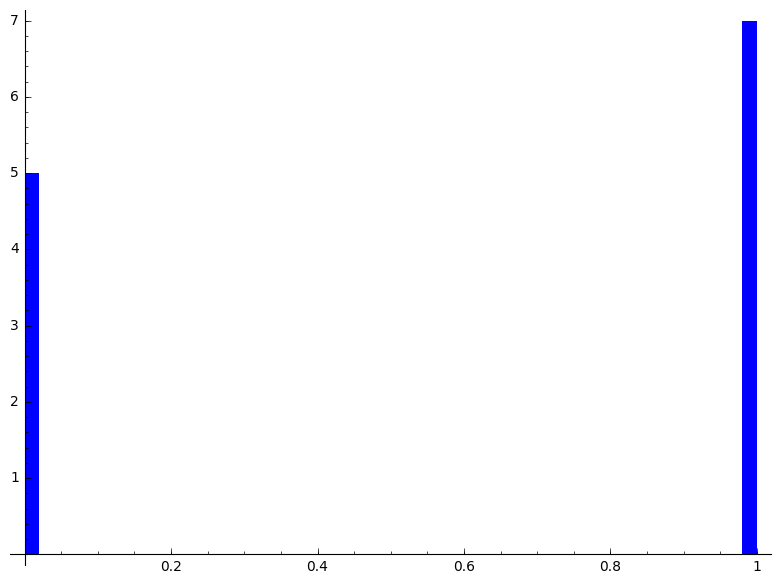

In [6]:
Histo1 = finance.TimeSeries(Q[1])
Histo1.plot_histogram(normalize=False)

In [11]:
def probPolya(L):
    #consideramos los 1's como bolas blancas
    return (sum(L)/len(L)).n(digits=7)

In [12]:
LCHECK = [1, 0, 1, 1, 0, 0, 0, 1, 0 , 1, 1]
print probPolya(LCHECK)

0.5454545


In [13]:
def NprobabilidadesPolya(N):
    L = [0, 1]
    T = []
    T.append(probPolya(L))
    for i in xsrange(N):
        L = nuevaUrna(L)
        T.append(probPolya(L))
    return T

In [17]:
TCHECK = NprobabilidadesPolya(10)
print TCHECK

[0.5000000, 0.3333333, 0.5000000, 0.4000000, 0.5000000, 0.4285714, 0.3750000, 0.3333333, 0.3000000, 0.2727273, 0.2500000]


In [30]:
TCHECK = NprobabilidadesPolya(100)
print TCHECK

[0.5000000, 0.3333333, 0.5000000, 0.6000000, 0.5000000, 0.4285714, 0.5000000, 0.4444444, 0.5000000, 0.5454545, 0.5833333, 0.6153846, 0.6428571, 0.6666667, 0.6250000, 0.6470588, 0.6111111, 0.6315789, 0.6500000, 0.6190476, 0.5909091, 0.6086956, 0.6250000, 0.6400000, 0.6153846, 0.5925926, 0.6071429, 0.5862069, 0.6000000, 0.6129032, 0.6250000, 0.6363636, 0.6176471, 0.6285714, 0.6111111, 0.5945946, 0.5789474, 0.5641026, 0.5750000, 0.5609756, 0.5714286, 0.5581395, 0.5681818, 0.5777778, 0.5652174, 0.5531915, 0.5416667, 0.5306122, 0.5200000, 0.5098039, 0.5000000, 0.5094340, 0.5185185, 0.5090909, 0.5000000, 0.4912281, 0.4827586, 0.4915254, 0.4833333, 0.4754098, 0.4838710, 0.4761905, 0.4843750, 0.4923077, 0.5000000, 0.4925373, 0.4852941, 0.4927536, 0.5000000, 0.5070423, 0.5138889, 0.5205479, 0.5135135, 0.5066667, 0.5131579, 0.5064935, 0.5128205, 0.5063291, 0.5000000, 0.4938272, 0.5000000, 0.4939759, 0.5000000, 0.5058824, 0.5000000, 0.5057471, 0.5113636, 0.5168539, 0.5111111, 0.5054945, 0.5000000

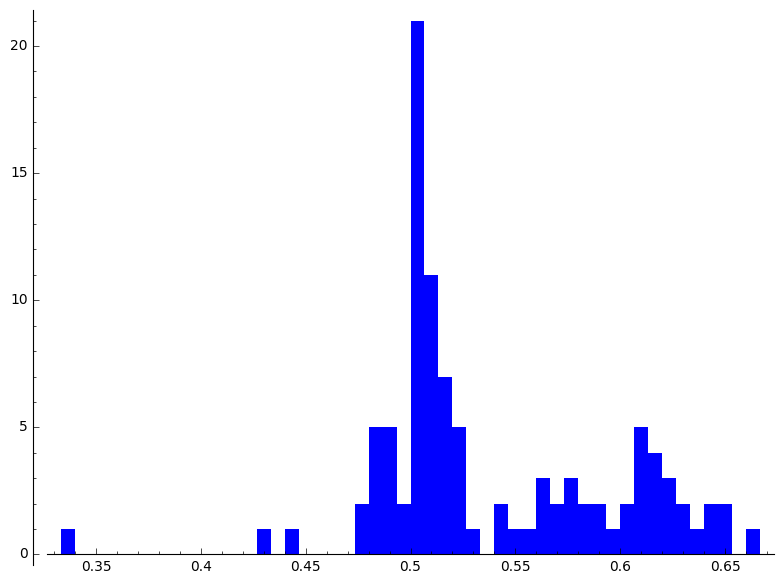

In [31]:
Histo2 = finance.TimeSeries(TCHECK)
Histo2.plot_histogram(normalize=False)

In [28]:
TCHECK2 = NprobabilidadesPolya(100)
print TCHECK2

[0.5000000, 0.3333333, 0.2500000, 0.4000000, 0.5000000, 0.5714286, 0.5000000, 0.5555556, 0.6000000, 0.6363636, 0.6666667, 0.6153846, 0.6428571, 0.6666667, 0.6250000, 0.6470588, 0.6666667, 0.6842105, 0.7000000, 0.7142857, 0.7272727, 0.7391304, 0.7500000, 0.7600000, 0.7692308, 0.7777778, 0.7500000, 0.7586207, 0.7666667, 0.7741935, 0.7812500, 0.7878788, 0.7941176, 0.7714286, 0.7777778, 0.7837838, 0.7631579, 0.7692308, 0.7500000, 0.7317073, 0.7380952, 0.7441860, 0.7500000, 0.7555556, 0.7608696, 0.7659574, 0.7708333, 0.7755102, 0.7600000, 0.7647059, 0.7500000, 0.7547170, 0.7592593, 0.7454545, 0.7500000, 0.7368421, 0.7241379, 0.7288136, 0.7333333, 0.7377049, 0.7258065, 0.7301587, 0.7343750, 0.7384615, 0.7424242, 0.7462687, 0.7352941, 0.7391304, 0.7428571, 0.7464789, 0.7500000, 0.7534247, 0.7567568, 0.7600000, 0.7631579, 0.7662338, 0.7692308, 0.7721519, 0.7750000, 0.7777778, 0.7804878, 0.7831325, 0.7857143, 0.7764706, 0.7790698, 0.7816092, 0.7727273, 0.7752809, 0.7777778, 0.7802198, 0.7826087

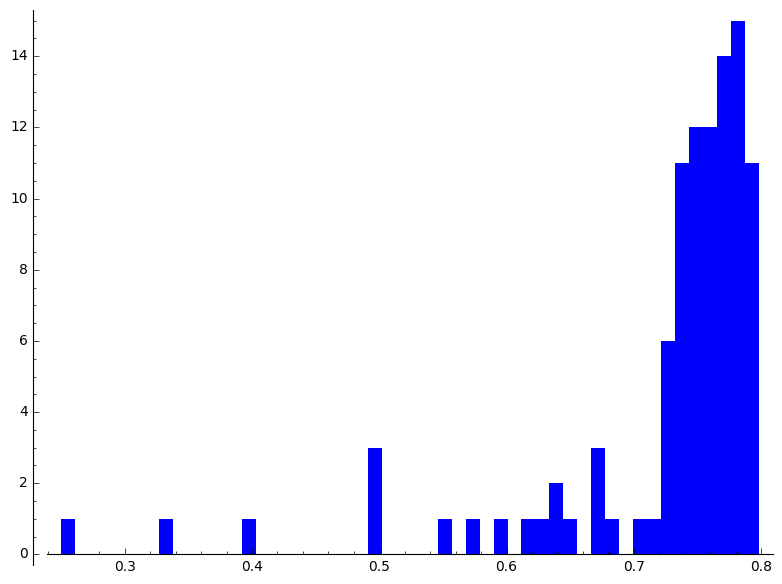

In [29]:
Histo3 = finance.TimeSeries(TCHECK2)
Histo3.plot_histogram(normalize=False)

In [36]:
TCHECK3 = NprobabilidadesPolya(100)
print TCHECK3

[0.5000000, 0.6666667, 0.5000000, 0.4000000, 0.5000000, 0.5714286, 0.6250000, 0.5555556, 0.5000000, 0.4545455, 0.4166667, 0.3846154, 0.3571429, 0.3333333, 0.3125000, 0.2941176, 0.2777778, 0.2631579, 0.2500000, 0.2380952, 0.2272727, 0.2173913, 0.2083333, 0.2400000, 0.2307692, 0.2222222, 0.2142857, 0.2068966, 0.2000000, 0.1935484, 0.1875000, 0.2121212, 0.2058824, 0.2000000, 0.1944444, 0.1891892, 0.1842105, 0.1794872, 0.1750000, 0.1707317, 0.1666667, 0.1627907, 0.1818182, 0.1777778, 0.1739130, 0.1702128, 0.1666667, 0.1632653, 0.1600000, 0.1568627, 0.1538462, 0.1509434, 0.1481481, 0.1636364, 0.1607143, 0.1578947, 0.1551724, 0.1525424, 0.1500000, 0.1639344, 0.1612903, 0.1746032, 0.1875000, 0.1846154, 0.1969697, 0.1940299, 0.1911765, 0.2028986, 0.2000000, 0.1971831, 0.1944444, 0.1917808, 0.1891892, 0.2000000, 0.1973684, 0.1948052, 0.1923077, 0.1898734, 0.1875000, 0.1851852, 0.1829268, 0.1927711, 0.1904762, 0.1882353, 0.1860465, 0.1839080, 0.1818182, 0.1797753, 0.1888889, 0.1978022, 0.1956522

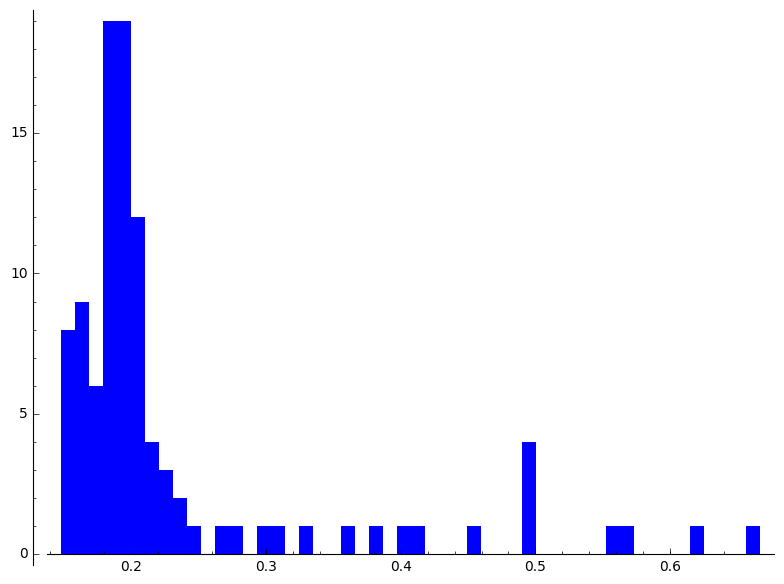

In [37]:
Histo4 = finance.TimeSeries(TCHECK3)
Histo4.plot_histogram(normalize=False)

Se puede ver después de algunos ejemplos que las probabilidades P(i) se concentran en un cierto intervalo después de un número considerable de "nuevas urnas". El intervalo de congregación depende del desarrollo de las primeras urnas, ya que dos bolas blancas seguidas tiene un gran impacto en las urnas posteriores ya que tiene mucha más probabilidad otra bola blanca.

In [41]:
def comportamientoPolya(N, n):
    T = []
    for i in xsrange(n):
        Laux = NprobabilidadesPolya(N)
        Histo = finance.TimeSeries(Laux)
        T.append(Histo)
    return T
        #Intentaba que la funcion mostrase los histogramas, pero no los muestra...
        #Histo.plot_histogram(bins=10, normalize=False)

In [42]:
Taux = comportamientoPolya(100, 10)

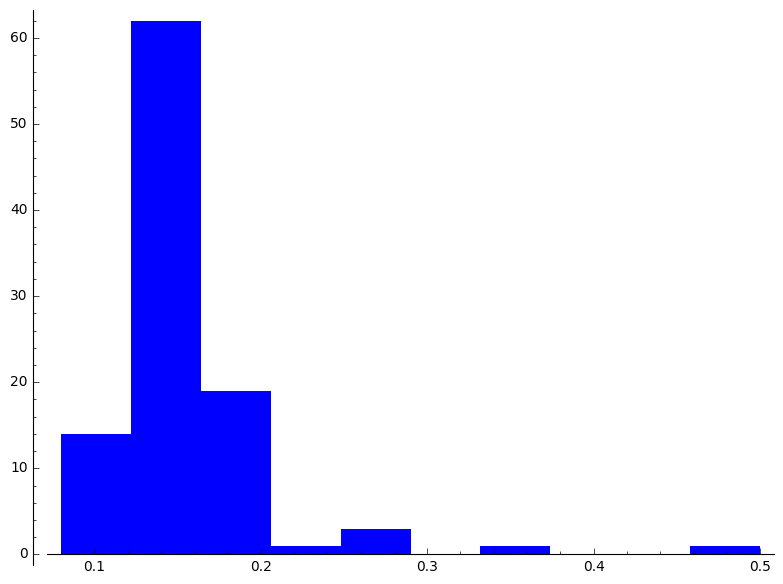

In [45]:
Taux[0].plot_histogram(bins=10, normalize=False)

In [46]:
#No consigo que se plotee un conjunto de histogramas.
for i in xsrange(len(Taux)):
    Taux[i].plot_histogram(bins=10, normalize=False)

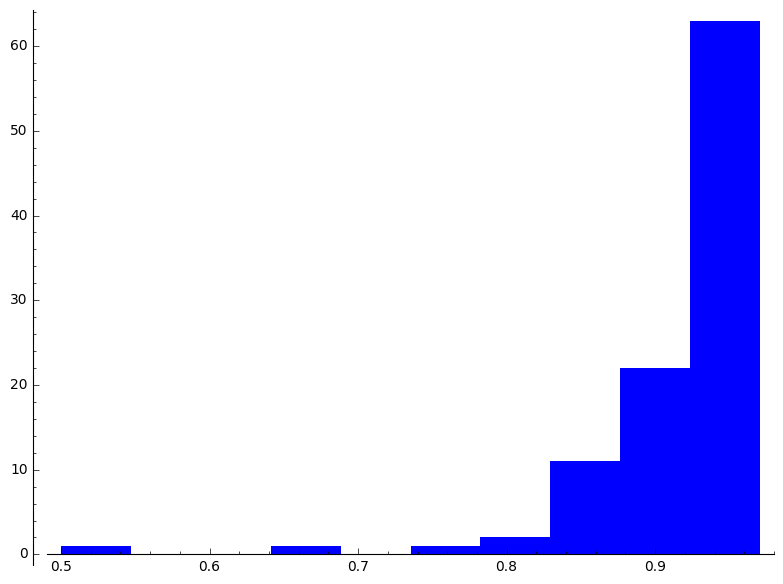

In [49]:
Taux[4].plot_histogram(bins=10, normalize=False)

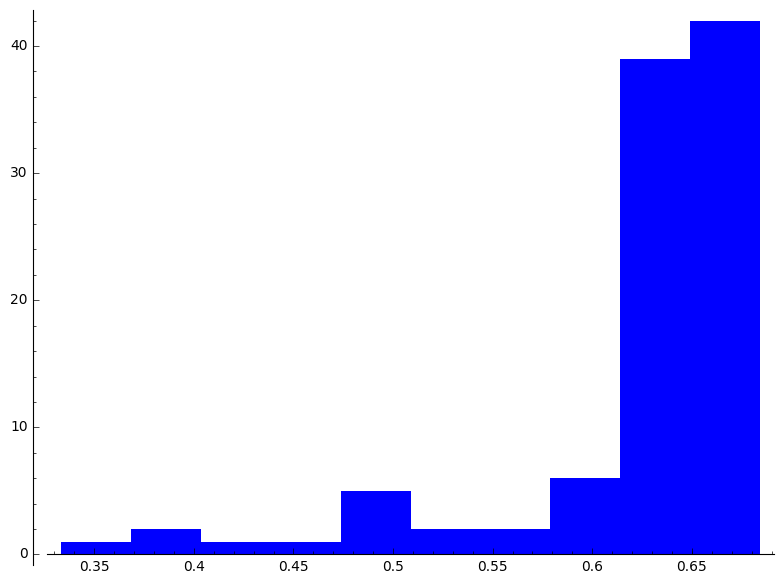

In [51]:
Taux[6].plot_histogram(bins=10, normalize=False)

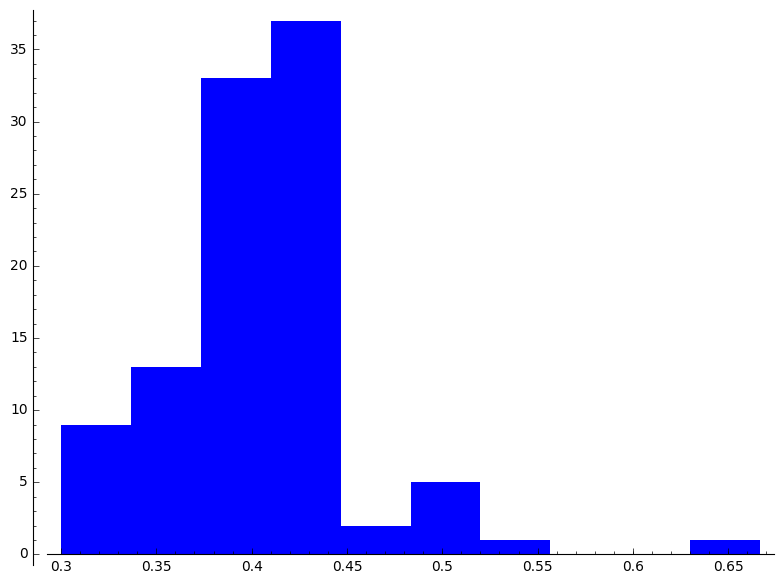

In [52]:
Taux[7].plot_histogram(bins=10, normalize=False)

Estos son algunos ejemplos. Se vuelve apreciar lo comentado anteriormente.